In [9]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

from sklearn.metrics import accuracy_score, jaccard_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import KFold, cross_val_score

import pandas as pd
import numpy as np
from pickle import dump, load

from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

In [10]:
X = pd.read_csv("Variable X.csv")
Y = pd.read_csv("Variable Y.csv")

X.drop(columns = 'Unnamed: 0', inplace = True)
Y.drop(columns = 'Unnamed: 0', inplace = True)

X_use = X.values
Y_use = Y.values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X_use, Y_use, random_state = 42)

In [7]:
models = [LogisticRegression(), RidgeClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(),
          ExtraTreesClassifier(), GradientBoostingClassifier(), HistGradientBoostingClassifier(),
          SVC(), GaussianNB(), BernoulliNB(), LinearDiscriminantAnalysis(), NearestCentroid(),
          KNeighborsClassifier()]

accuracy = -np.inf
model_selected = None

for model in models:
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    
    if accuracy_score(y_test, yhat) > accuracy:
        accuracy = accuracy_score(y_test, yhat)
        model_selected = model
        
print(f"El mejor modelo es {model_selected}, con un accuracy de {round(accuracy, 2)*100}%")

El mejor modelo es HistGradientBoostingClassifier(), con un accuracy de 97.0%


In [5]:
kfold = KFold(n_splits = 100, random_state = 42, shuffle = True)

cross_val_scores = cross_val_score(model_selected, X_use, Y_use, cv = kfold)

print(cross_val_scores.mean())
print(cross_val_scores.std())

print(f"\nTodas las puntuaciones: {cross_val_scores}")

0.9699346832382606
0.007891247508123774

Todas las puntuaciones: [0.95145631 0.95339806 0.97281553 0.96504854 0.97087379 0.96504854
 0.97475728 0.97475728 0.98252427 0.97475728 0.95728155 0.97281553
 0.96116505 0.96893204 0.97669903 0.97087379 0.96116505 0.97087379
 0.96893204 0.96699029 0.96504854 0.96893204 0.96699029 0.96116505
 0.97475728 0.97281553 0.97864078 0.98058252 0.95728155 0.98252427
 0.97475728 0.96893204 0.95728155 0.98058252 0.96893204 0.97281553
 0.97087379 0.97475728 0.97281553 0.97475728 0.95339806 0.97087379
 0.9592233  0.96504854 0.98252427 0.98252427 0.97087379 0.97864078
 0.98058252 0.97281553 0.96699029 0.96893204 0.97669903 0.98252427
 0.95533981 0.97281553 0.97669903 0.95339806 0.9631068  0.97475728
 0.9592233  0.95728155 0.96504854 0.97864078 0.97864078 0.97087379
 0.97475728 0.97281553 0.9592233  0.97281553 0.96116505 0.96699029
 0.97475728 0.96893204 0.96699029 0.97864078 0.97281553 0.96699029
 0.98252427 0.97281553 0.98058252 0.97669903 0.97864078 0.974757

In [6]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Exactitud:"    , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.9341495397868739
Exactitud: 0.9659752971335354
Precisión: 0.9662858006705285
Sensibilidad: 0.9658117067299892
F1-score: 0.965953058384011
Jaccard Index: 0.9341495397868739
Exactitud: 0.9659752971335354
Precisión: 0.9662858006705285
Sensibilidad: 0.9658117067299892
F1-score: 0.965953058384011


In [7]:
confusion_matrix(y_test, yhat, labels = [1, 2])

array([[6382,  155],
       [ 283, 6053]], dtype=int64)

array([[6382,  155],
       [ 283, 6053]], dtype=int64)

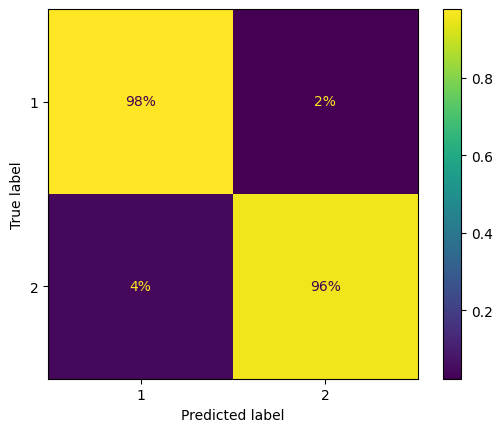

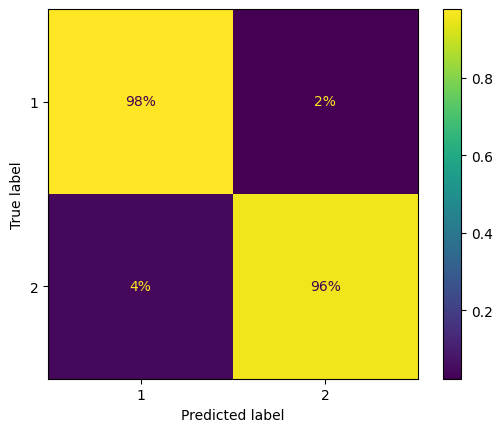

In [8]:
matriz = ConfusionMatrixDisplay.from_predictions(y_test, yhat, normalize='true', values_format='.0%')

# Guardar la imagen en un archivo PNG (o el formato que desees) ANTES de llamar a plt.show()
plt.savefig('matriz_de_confusion.png')

# Mostrar la figura en la pantalla
plt.show()

In [9]:
print(classification_report(y_test, yhat, digits = 2))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      6537
           2       0.98      0.96      0.97      6336

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873

              precision    recall  f1-score   support

           1       0.96      0.98      0.97      6537
           2       0.98      0.96      0.97      6336

    accuracy                           0.97     12873
   macro avg       0.97      0.97      0.97     12873
weighted avg       0.97      0.97      0.97     12873



Area bajo la curva: 0.9974208704955321
Area bajo la curva: 0.9974208704955321


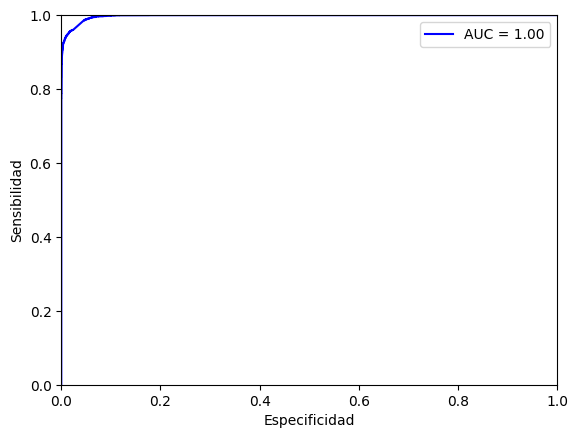

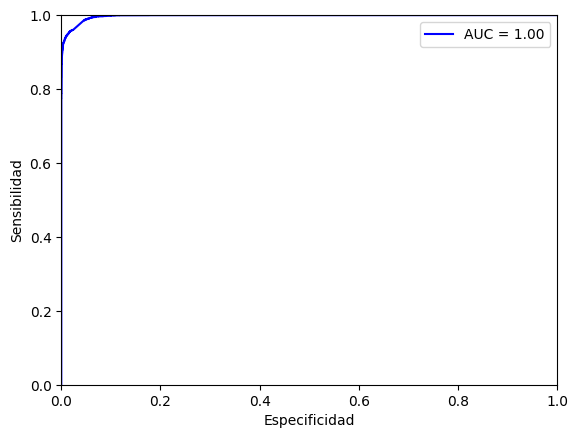

In [10]:
probs = model_selected.predict_proba(x_test)

preds = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds, pos_label = 2)
roc_auc = auc(fpr, tpr)

print("Area bajo la curva:", auc(fpr, tpr))

plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel("Sensibilidad")
plt.xlabel("Especificidad")

plt.legend()

plt.show()

In [11]:
print("ROC AUC:", roc_auc_score(y_test, yhat))

ROC AUC: 0.9658117067299893
ROC AUC: 0.9658117067299893


In [12]:
from sklearn.metrics import log_loss

y_pred_proba = model_selected.predict_proba(x_test)

logloss = log_loss(y_test, y_pred_proba)

print("Log Loss:", logloss)

Log Loss: 0.0628429947699471
Log Loss: 0.0628429947699471


In [9]:
X

,t2_towerKills,t1_towerKills,firstInhibitor,t2_inhibitorKills,t1_inhibitorKills,firstTower,firstBaron,t2_dragonKills,t1_dragonKills,t1_baronKills,t2_baronKills,firstDragon
0,5,11,1,0,1,1,1,1,3,2,0,1
1,2,10,1,0,4,1,0,0,2,0,0,1
2,2,8,1,0,1,1,1,1,1,1,0,2
3,0,9,1,0,2,1,1,0,2,1,0,1
4,3,9,1,0,2,1,1,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51485,10,2,2,2,0,2,0,4,0,0,0,2
51486,11,5,2,7,4,1,2,4,2,0,4,2
51487,10,0,2,2,0,2,0,2,1,0,0,1
51488,11,0,2,3,0,2,0,1,0,0,0,2


In [10]:
X['t1_dragonKills'].max()

6

In [16]:
test = (6, 6, 1, 1, 1, 2, 1, 1, 3, 1, 0, 2)
test = np.array(test)

print(f"{round(model_selected.predict_proba(test.reshape(1, -1))[0][1]*100, 2)}%")

53.11%


In [15]:
model_selected.predict(test.reshape(1, -1))[0]

2

In [12]:
dump(model_selected, open("Model.pkl", "wb"))